<a href="https://colab.research.google.com/github/manasjain206/Image-Classifier-Using-SVM-/blob/main/Image_classifier_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR ='/content/drive/MyDrive/images_minor_project'
CATEGORIES = ['pretty sunflower', 'rugby ball leather', 'ice cream cone']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)  # label encoding the values
  path = os.path.join(DATADIR,category)   # creating path to use all the images
  for img in os.listdir(path):
   img_array = imread(os.path.join(path,img))

#preprocessing
  # 1. Resizing
  # 2. Flattening-->to convert image ie 2D into a vector 1D
   img_resized = resize(img_array,(150,150,3))   #Normalizes pixel values of imgs b/w 0 to 1
   flat_data.append(img_resized.flatten())
   images.append(img_resized)
   target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)   


In [ ]:
flat_data[0]

array([0.60043137, 0.44745316, 0.19628758, ..., 0.53703268, 0.3723268 ,
       0.1840915 ])

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<BarContainer object of 3 artists>

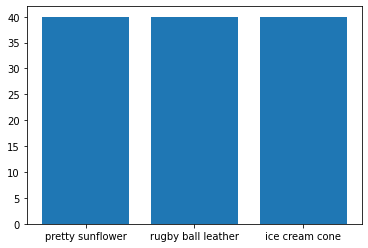

In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
#Split data into Training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [ ]:
#Model Training
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train , y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
#Model Testing
y_pred = clf.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 2 2 1 2 0 0 2 1 1 0 2 0 2 2 0 0 2 0 2 1 1 2 0 0 0 2 2 0 1 1 1 2 2 1 0]
The actual data is:
[0 2 2 1 2 0 0 2 1 2 0 2 0 2 2 0 0 2 0 2 1 1 2 0 0 0 2 2 2 1 1 1 1 2 2 0]
The model is 88.88888888888889% accurate


In [ ]:
confusion_matrix(y_pred,y_test)

array([[12,  0,  1],
       [ 0,  7,  2],
       [ 0,  1, 13]])

In [ ]:
# save and load the model using Pickle library
import pickle
model = pickle.load(open('/content/drive/MyDrive/Minor_project_model/img_model.p','rb'))
print("Pickle is loaded successfully")


Pickle is loaded successfully


Enter your URLhttps://image.shutterstock.com/image-photo/american-football-isolated-on-white-600w-711903961.jpg
(420, 600, 3)
pretty sunflower = 0.3039499168439129%
rugby ball leather = 98.756264310972%
ice cream cone = 0.9397857721840801%
The PREDICTED IMAGE is : rugby ball leather


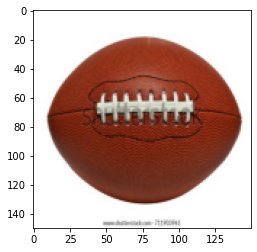

In [ ]:
#Evaluating a brand new Image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
probability=model.predict_proba(flat_data)
for ind,val in enumerate(CATEGORIES):
    print(f'{val} = {probability[0][ind]*100}%')
print("The PREDICTED IMAGE is : "+CATEGORIES[model.predict(flat_data)[0]])